Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

Add the images from train and test datasets (only leaf_mold,Late_blight,Healty,Early_blight) to x_train and x_test and the corresponding labels to the y_train and y_test (in form of one-hot)

In [4]:
x_tr = list()
y_tr = np.zeros((20000,5))
x_te = list()
y_te = np.zeros((4000, 5))
i = 0
#train location
for img in os.listdir('dataset/train/Tomato___Leaf_Mold'):
  x_tr.append(plt.imread(os.path.join('dataset/train/Tomato___Leaf_Mold', img))) 
  y_tr[i][0] = 1
  i += 1

for img in os.listdir('dataset/train/Tomato___Late_blight'):
  x_tr.append(plt.imread(os.path.join('dataset/train/Tomato___Late_blight', img))) 
  y_tr[i][1] = 1
  i += 1

for img in os.listdir('dataset/train/Tomato___healthy'):
  x_tr.append(plt.imread(os.path.join('dataset/train/Tomato___healthy', img))) 
  y_tr[i][2] = 1
  i += 1

for img in os.listdir('dataset/train/Tomato___Early_blight'):
  x_tr.append(plt.imread(os.path.join('dataset/train/Tomato___Early_blight', img))) 
  y_tr[i][3] = 1
  i += 1

for img in os.listdir('dataset/train/Tomato___Bacterial_spot'):
  x_tr.append(plt.imread(os.path.join('dataset/train/Tomato___Bacterial_spot', img))) 
  y_tr[i][4] = 1
  i += 1
#test location
i = 0
for img in os.listdir('dataset/test/Tomato___Leaf_Mold'):
  x_te.append(plt.imread(os.path.join('dataset/test/Tomato___Leaf_Mold', img))) 
  y_te[i][0] = 1
  i += 1
for img in os.listdir('dataset/test/Tomato___Late_blight'):
  x_te.append(plt.imread(os.path.join('dataset/test/Tomato___Late_blight', img))) 
  y_te[i][1] = 1
  i += 1
for img in os.listdir('dataset/test/Tomato___healthy'):
  x_te.append(plt.imread(os.path.join('dataset/test/Tomato___healthy', img))) 
  y_te[i][2] = 1
  i += 1
for img in os.listdir('dataset/test/Tomato___Early_blight'):
  x_te.append(plt.imread(os.path.join('dataset/test/Tomato___Early_blight', img))) 
  y_te[i][3] = 1
  i += 1
for img in os.listdir('dataset/test/Tomato___Bacterial_spot'):
  x_te.append(plt.imread(os.path.join('dataset/test/Tomato___Bacterial_spot', img))) 
  y_te[i][3] = 1
  i += 1

x_test = np.array(x_te)
x_train = np.array(x_tr)
y_train = y_tr
y_test = y_te

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9281, 256, 256, 3) (2319, 256, 256, 3) (20000, 5) (4000, 5)


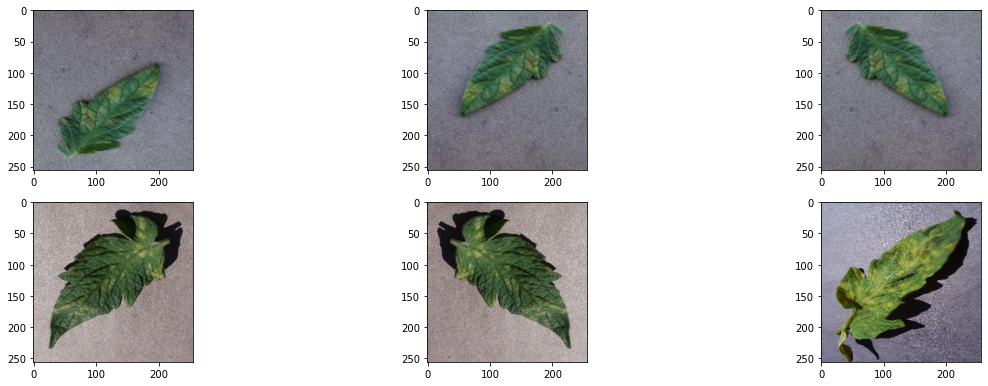

In [5]:
# plotting some images
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()

Converting x_train and x_test to grayscale

In [6]:
# convert to gray pictures
def rgb2gray(rgb):
 r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
 gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
 return gray
x_train = rgb2gray(x_train)
x_test = rgb2gray(x_test)

Normalizing x_train and x_test

In [7]:
# normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

Flating x_train and x_test

In [8]:
# flating the data
x_train = x_train.reshape(-1, 1024)
x_test = x_test.reshape(-1, 1024)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(593984, 1024) (20000, 5) (148416, 1024) (4000, 5)


Shuffling the data and labels together

In [9]:
# shuffle data
from sklearn.utils import shuffle
def shuffle_data(x, y):
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)
  return (x[indices], y[indices])

Sigmoid Function

In [10]:
# sigmoid
def sigmoid(x):
  sig = 1 / (1 + np.exp(-x))
  return sig

Deritive of sigmoid function

In [11]:
def sigmoid_deriv(x):
  s = sigmoid(x)
  return s*(1-s)

**Feed forward phase**

>First, we initialize the weights with random normal values and the biases with zero values. Then, we use np.dot to calculate the dot product of input and weights. After adding the bias, we use sigmoid function that was previously defined to calculate the output of a layer (the output of this layer is the input of the next layer). So we keep doing this until we reach the last layer; The output of the last layer(a3) is the main output. Since the maximum value of the output specifies the estimation of image's label, we use argmax and compare it to the actual label of that image. If the values are equal, the estimation was correct; so we increase the 'num' parameter which holds the number of correct estimations.
At the end we calculate the accuracy percentage using 'num' parameter.



In [20]:
# feed forward
num = 0
for i in range(200):
  a0 = x_train[i].reshape(-1, 1)
  # print(a0.shape)
  w1 = np.random.normal(size=(16, 1024))
  b1 = np.zeros((16, 1))

  w2 = np.random.normal(size=(16, 16))
  b2 = np.zeros((16, 1))

  w3 = np.random.normal(size=(5, 16))
  b3 = np.zeros((5, 1)) 

  z1 = np.dot(w1, a0) + b1
  a1 = sigmoid(z1)

  z2 = np.dot(w2, a1) + b2
  a2 = sigmoid(z2)

  z3 = np.dot(w3, a2) + b3
  a3 = sigmoid(z3)

  if a3.argmax() == y_train[i].argmax():
    num += 1
acc = num/200 * 100
print(acc)

15.0


**Back Propagation**


> First, we set the hyperparameters and initialize the weights with random values and biases with 0. Then, in each epoch we shuffle the datasets using shuffle_data function which is defined previously, and after that we create some batches and in each batch we initialize the gradient matrices with 0 and then for each image in that batch we do the feed forward phase (just like before) and calculate the gradient matrices for weights and biases and outputs of each layer. At the end of each batch, we update the weights and biases using learning rate, gradients and batch_size. For calculating the costs, at the end of each epoch, for each image in the train_set we do the forward phase and calculate the cost using the SSE (sum of square errors) and add it to the costs list. After training, we do the forward phase for train_set and compare its output with the actual output (y) like before and increase the correct_guess parameter in case of equality.
Finaly, we plot the average cost in each epoch using costs list and we see that the result is desirable. 



run time:  126.29807090759277
accuracy:  100.0


Text(0.5, 1.0, 'model loss')

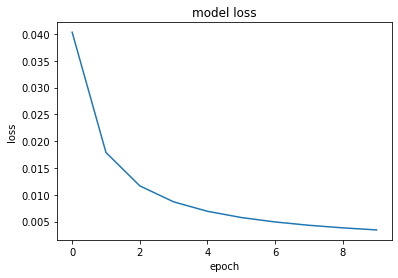

In [21]:
import time
# back propogation
batch_size = 16
learning_rate = 0.3
epochs = 10
#x_train, y_train = shuffle(x_train, y_train)
a0 = x_train[0:200][:][:]
y = y_train[0:200][:][:]
train_set =list(zip(x_train, y_train))

w1 = np.random.normal(size=(16, 1024))
b1 = np.zeros((16, 1))

w2 = np.random.normal(size=(16, 16))
b2 = np.zeros((16, 1))

w3 = np.random.normal(size=(5, 16))
b3 = np.zeros((5, 1)) 
start = time.time()
costs = []

for i in range(epochs):
  a0, y = shuffle_data(a0, y)
  for b in range(0, 12): # 200/16 = 12.5
    batch = a0[b*16:(b+1)*16]
    y_batch = y[b*16:(b+1)*16]
    # print(batch.shape)
    # print(y_batch.shape)
    grad_w1 = np.zeros((16, 1024))
    grad_b1 = np.zeros((16, 1))
    grad_w2 = np.zeros((16, 16))
    grad_b2 = np.zeros((16, 1))
    grad_w3 = np.zeros((5, 16))
    grad_b3 = np.zeros((5, 1))
    for m in range(0, 16):
      img = batch[m].reshape(-1,1)
      out = y_batch[m].reshape(-1,1)

      z1 = np.dot(w1, img) + b1
      a1 = sigmoid(z1)
      z2 = np.dot(w2, a1) + b2
      a2 = sigmoid(z2)
      z3 = np.dot(w3, a2) + b3
      a3 = sigmoid(z3)
      
      # print(a3.shape, out.shape)

      for j in range(4):
        for k in range(16):
          grad_w3[j, k] += a2[k, 0] * sigmoid_deriv(z3[j, 0]) * ((2 * a3[j, 0]) - (2 * out[j, 0]))

      for j in range(4):
        grad_b3[j, 0] += sigmoid_deriv(z3[j, 0]) * ((2 * a3[j, 0]) - (2 * out[j, 0]))

      grad_a3 = np.zeros((16, 1))
      for j in range(16):
        for k in range(4):
          grad_a3[j, 0] += ((2 * a3[k, 0]) - (2 * out[k, 0])) * sigmoid_deriv(z3[k, 0]) * w3[k, j]
      
      for j in range(16):
        for k in range(16):
          grad_w2[j, k] += a1[k, 0] * sigmoid_deriv(z2[j, 0]) * grad_a3[j, 0]

      for j in range(16):
        grad_b2[j, 0] += sigmoid_deriv(z2[j, 0]) * grad_a3[j, 0]
       
      grad_a2 = np.zeros((16, 1))
      for j in range(16):
        for k in range(16):
          grad_a2[j, 0] += grad_a3[k, 0] * sigmoid_deriv(z2[k, 0]) * w2[k, j]

      for j in range(16):
        for k in range(1024):
          grad_w1[j, k] += img[k, 0] * sigmoid_deriv(z1[j, 0]) * grad_a2[j, 0]
      
      for j in range(16):
          grad_b1[j, 0] += sigmoid_deriv(z1[j, 0]) * grad_a2[j, 0]

    w1 = w1 - (learning_rate*(grad_w1/batch_size))
    b1 = b1 - (learning_rate*(grad_b1/batch_size))
    w2 = w2 - (learning_rate*(grad_w2/batch_size))
    b2 = b2 - (learning_rate*(grad_b2/batch_size))
    w3 = w3 - (learning_rate*(grad_w3/batch_size))
    b3 = b3 - (learning_rate*(grad_b3/batch_size))
  cost = 0
  for train_data in train_set[:200]:
    img = train_data[0].reshape(-1, 1)
    z1 = np.dot(w1, img) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(w3, a2) + b3
    a3 = sigmoid(z3)
    for j in range(0,4):
      cost = cost + ((a3[j, 0] - train_data[1].reshape(-1,1)[j,  0]) ** 2)
  costs.append(cost/200) 
  
correct_guess = 0
for train_data in train_set[:200]:
  img = train_data[0].reshape(-1, 1)
  z1 = np.dot(w1, img) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(w2, a1) + b2
  a2 = sigmoid(z2)
  z3 = np.dot(w3, a2) + b3
  a3 = sigmoid(z3)
    
  if a3.argmax() == train_data[1].argmax():
     correct_guess =  correct_guess + 1 
end = time.time()
print('run time: ',end-start) 
print('accuracy: ', (correct_guess/200)*100)   
epoch_size = [x for x in range(0,10)]
plt.plot(epoch_size, costs)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')



**Vectorization**
We replace the for loops for calculating the gradients with matrix multiplication. By doing this, we see that the runtime will significantly reduced.

(0.7485947608947754, 100.0)

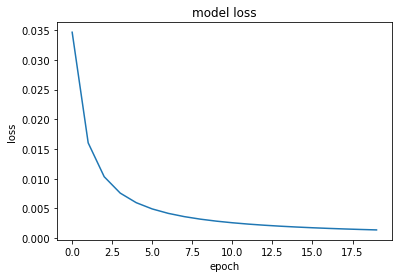

In [22]:
def back_prop_vectorized(x_train, y_train):
  batch_size = 16
  learning_rate = 0.3
  epochs = 20

  #x_train, y_train = shuffle(x_train, y_train)
  a0 = x_train[0:200][:][:]
  y = y_train[0:200][:][:]
  train_set =list(zip(x_train, y_train))

  w1 = np.random.normal(size=(16, 1024))
  b1 = np.zeros((16, 1))

  w2 = np.random.normal(size=(16, 16))
  b2 = np.zeros((16, 1))

  w3 = np.random.normal(size=(5, 16))
  b3 = np.zeros((5, 1)) 
  start = time.time()

  costs = []
  for i in range(epochs):
    a0, y = shuffle_data(a0, y)
    for b in range(0, 12): # 200/16 = 12.5
      batch = a0[b*16:(b+1)*16]
      y_batch = y[b*16:(b+1)*16]
      # print(batch.shape)
      # print(y_batch.shape)
      grad_w1 = np.zeros((16, 1024))
      grad_b1 = np.zeros((16, 1))
      grad_w2 = np.zeros((16, 16))
      grad_b2 = np.zeros((16, 1))
      grad_w3 = np.zeros((5, 16))
      grad_b3 = np.zeros((5, 1))
      for m in range(0, 16):
        img = batch[m].reshape(-1,1)
        out = y_batch[m].reshape(-1,1)

        z1 = np.dot(w1, img) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(w2, a1) + b2
        a2 = sigmoid(z2)
        z3 = np.dot(w3, a2) + b3
        a3 = sigmoid(z3)

        
        grad_w3 += (2 * sigmoid_deriv(z3) * (a3 - out)) @ (np.transpose(a2))

        grad_b3 += sigmoid_deriv(z3) * ((2 * a3) - (2 * out))

        grad_a3 = np.zeros((16, 1))
        grad_a3 += (np.transpose(w3)) @ (((2 * a3) - (2 * out)) * sigmoid_deriv(z3) )
        

        grad_w2 += (sigmoid_deriv(z2) * grad_a3) @ (np.transpose(a1)) 

        grad_b2 += sigmoid_deriv(z2) * grad_a3
        
        grad_a2 = np.zeros((16, 1))
        grad_a2 += np.transpose(w2) @ (2 * sigmoid_deriv(z2) * grad_a3)

        grad_w1 += sigmoid_deriv(z1) * grad_a2 @ (np.transpose(img))
        
        grad_b1 += sigmoid_deriv(z1) * grad_a2

      w1 = w1 - (learning_rate*(grad_w1/batch_size))
      b1 = b1 - (learning_rate*(grad_b1/batch_size))
      w2 = w2 - (learning_rate*(grad_w2/batch_size))
      b2 = b2 - (learning_rate*(grad_b2/batch_size))
      w3 = w3 - (learning_rate*(grad_w3/batch_size))
      b3 = b3 - (learning_rate*(grad_b3/batch_size))
    cost = 0
    for train_data in train_set[:200]:
      img = train_data[0].reshape(-1, 1)
      z1 = np.dot(w1, img) + b1
      a1 = sigmoid(z1)
      z2 = np.dot(w2, a1) + b2
      a2 = sigmoid(z2)
      z3 = np.dot(w3, a2) + b3
      a3 = sigmoid(z3)
      for j in range(0,4):
        cost = cost + ((a3[j, 0] - train_data[1].reshape(-1,1)[j,  0]) ** 2)
    costs.append(cost/200) 

  correct_guess = 0
  for train_data in train_set[:200]:
    img = train_data[0].reshape(-1, 1)
    z1 = np.dot(w1, img) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(w3, a2) + b3
    a3 = sigmoid(z3)
      
    if a3.argmax() == train_data[1].argmax():
      correct_guess =  correct_guess + 1 
  end = time.time()
  # print(np.sum(costs))
  # print('run time: ',end-start) 
  # print('accuracy: ', (correct_guess/200)*100)   
  epoch_size = [x for x in range(0,20)]
  plt.plot(epoch_size, costs)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title('model loss')
  runtime = end - start
  acc = (correct_guess/200)*100
  return runtime, acc
back_prop_vectorized(x_train, y_train)

0.758863377571106
100.0


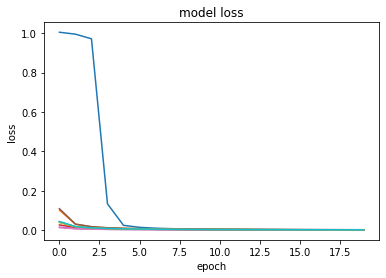

In [23]:
# run the vectorized back propagation 10 times
tot_runtime = 0
tot_acc = 0
for i in range(10):
  runtime, acc = back_prop_vectorized(x_train, y_train)
  tot_runtime += runtime
  tot_acc += acc
print(tot_runtime/10)
print(tot_acc/10)

**Testing the model**


> First we train the model with 8000 data and run the function 10 times. Then we do the same for test dataset.



(63.47440004348755, 34.637499999999996)

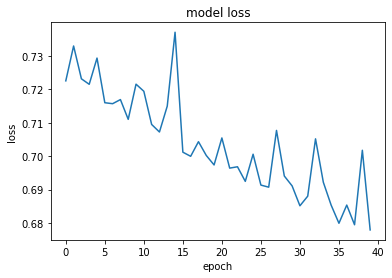

In [25]:
def back_prop_train(x_train, y_train):
  batch_size = 16
  learning_rate = 0.3
  epochs = 40

  #x_train, y_train = shuffle(x_train, y_train)
  a0 = x_train[0:8000][:][:]
  y = y_train[0:8000][:][:]
  train_set =list(zip(x_train, y_train))

  w1 = np.random.normal(size=(16, 1024))
  b1 = np.zeros((16, 1))

  w2 = np.random.normal(size=(16, 16))
  b2 = np.zeros((16, 1))

  w3 = np.random.normal(size=(5, 16))
  b3 = np.zeros((5, 1)) 
  start = time.time()

  costs = []
  for i in range(epochs):
    a0, y = shuffle_data(a0, y)
    for b in range(0, 500): # 8000/16 = 500
      batch = a0[b*16:(b+1)*16]
      y_batch = y[b*16:(b+1)*16]
      # print(batch.shape)
      # print(y_batch.shape)
      grad_w1 = np.zeros((16, 1024))
      grad_b1 = np.zeros((16, 1))
      grad_w2 = np.zeros((16, 16))
      grad_b2 = np.zeros((16, 1))
      grad_w3 = np.zeros((5, 16))
      grad_b3 = np.zeros((5, 1))
      for m in range(0, 16):
        img = batch[m].reshape(-1,1)
        out = y_batch[m].reshape(-1,1)

        z1 = np.dot(w1, img) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(w2, a1) + b2
        a2 = sigmoid(z2)
        z3 = np.dot(w3, a2) + b3
        a3 = sigmoid(z3)

        
        grad_w3 += (2 * sigmoid_deriv(z3) * (a3 - out)) @ (np.transpose(a2))

        grad_b3 += sigmoid_deriv(z3) * ((2 * a3) - (2 * out))

        grad_a3 = np.zeros((16, 1))
        grad_a3 += (np.transpose(w3)) @ (((2 * a3) - (2 * out)) * sigmoid_deriv(z3) )
        

        grad_w2 += (sigmoid_deriv(z2) * grad_a3) @ (np.transpose(a1)) 

        grad_b2 += sigmoid_deriv(z2) * grad_a3
        
        grad_a2 = np.zeros((16, 1))
        grad_a2 += np.transpose(w2) @ (2 * sigmoid_deriv(z2) * grad_a3)

        grad_w1 += sigmoid_deriv(z1) * grad_a2 @ (np.transpose(img))
        
        grad_b1 += sigmoid_deriv(z1) * grad_a2

      w1 = w1 - (learning_rate*(grad_w1/batch_size))
      b1 = b1 - (learning_rate*(grad_b1/batch_size))
      w2 = w2 - (learning_rate*(grad_w2/batch_size))
      b2 = b2 - (learning_rate*(grad_b2/batch_size))
      w3 = w3 - (learning_rate*(grad_w3/batch_size))
      b3 = b3 - (learning_rate*(grad_b3/batch_size))
    cost = 0
    for train_data in train_set[:8000]:
      img = train_data[0].reshape(-1, 1)
      z1 = np.dot(w1, img) + b1
      a1 = sigmoid(z1)
      z2 = np.dot(w2, a1) + b2
      a2 = sigmoid(z2)
      z3 = np.dot(w3, a2) + b3
      a3 = sigmoid(z3)
      for j in range(0,4):
        cost = cost + ((a3[j, 0] - train_data[1].reshape(-1,1)[j,  0]) ** 2)
    costs.append(cost/8000) 

  correct_guess = 0
  for train_data in train_set[:8000]:
    img = train_data[0].reshape(-1, 1)
    z1 = np.dot(w1, img) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(w3, a2) + b3
    a3 = sigmoid(z3)
      
    if a3.argmax() == train_data[1].argmax():
      correct_guess =  correct_guess + 1 
  end = time.time() 
  epoch_size = [x for x in range(0,40)]
  plt.plot(epoch_size, costs)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title('model loss')
  runtime = end - start
  acc = (correct_guess/8000)*100
  return runtime, acc
back_prop_train(x_train, y_train)

61.638112378120425
31.86625


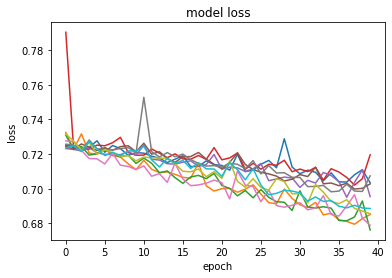

In [26]:
# run the back propagation for 8000 train data 10 times
tot_runtime = 0
tot_acc = 0
for i in range(10):
  runtime, acc = back_prop_train(x_train, y_train)
  tot_runtime += runtime
  tot_acc += acc
print(tot_runtime/10)
print(tot_acc/10)

(30.843743085861206, 26.700000000000003)

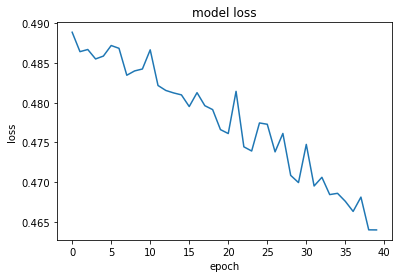

In [28]:
# run back propagation with all the test datas
def back_prop_test(x_test, y_test):
  batch_size = 16
  learning_rate = 0.3
  epochs = 40

  #x_test, y_test = shuffle(x_test, y_test)
  a0 = x_test[0:4000][:][:]
  y = y_test[0:4000][:][:]
  test_set =list(zip(x_test, y_test))

  w1 = np.random.normal(size=(16, 1024))
  b1 = np.zeros((16, 1))

  w2 = np.random.normal(size=(16, 16))
  b2 = np.zeros((16, 1))

  w3 = np.random.normal(size=(5, 16))
  b3 = np.zeros((5, 1)) 
  start = time.time()

  costs = []
  for i in range(epochs):
    a0, y = shuffle_data(a0, y)
    for b in range(0, 250): # 4000/16 = 250
      batch = a0[b*16:(b+1)*16]
      y_batch = y[b*16:(b+1)*16]
      # print(batch.shape)
      # print(y_batch.shape)
      grad_w1 = np.zeros((16, 1024))
      grad_b1 = np.zeros((16, 1))
      grad_w2 = np.zeros((16, 16))
      grad_b2 = np.zeros((16, 1))
      grad_w3 = np.zeros((5, 16))
      grad_b3 = np.zeros((5, 1))
      for m in range(0, 16):
        img = batch[m].reshape(-1,1)
        out = y_batch[m].reshape(-1,1)

        z1 = np.dot(w1, img) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(w2, a1) + b2
        a2 = sigmoid(z2)
        z3 = np.dot(w3, a2) + b3
        a3 = sigmoid(z3)

        
        grad_w3 += (2 * sigmoid_deriv(z3) * (a3 - out)) @ (np.transpose(a2))

        grad_b3 += sigmoid_deriv(z3) * ((2 * a3) - (2 * out))

        grad_a3 = np.zeros((16, 1))
        grad_a3 += (np.transpose(w3)) @ (((2 * a3) - (2 * out)) * sigmoid_deriv(z3) )
        

        grad_w2 += (sigmoid_deriv(z2) * grad_a3) @ (np.transpose(a1)) 

        grad_b2 += sigmoid_deriv(z2) * grad_a3
        
        grad_a2 = np.zeros((16, 1))
        grad_a2 += np.transpose(w2) @ (2 * sigmoid_deriv(z2) * grad_a3)

        grad_w1 += sigmoid_deriv(z1) * grad_a2 @ (np.transpose(img))
        
        grad_b1 += sigmoid_deriv(z1) * grad_a2

      w1 = w1 - (learning_rate*(grad_w1/batch_size))
      b1 = b1 - (learning_rate*(grad_b1/batch_size))
      w2 = w2 - (learning_rate*(grad_w2/batch_size))
      b2 = b2 - (learning_rate*(grad_b2/batch_size))
      w3 = w3 - (learning_rate*(grad_w3/batch_size))
      b3 = b3 - (learning_rate*(grad_b3/batch_size))
    cost = 0
    for test_data in test_set[:4000]:
      img = test_data[0].reshape(-1, 1)
      z1 = np.dot(w1, img) + b1
      a1 = sigmoid(z1)
      z2 = np.dot(w2, a1) + b2
      a2 = sigmoid(z2)
      z3 = np.dot(w3, a2) + b3
      a3 = sigmoid(z3)
      for j in range(0,4):
        cost = cost + ((a3[j, 0] - test_data[1].reshape(-1,1)[j,  0]) ** 2)
    costs.append(cost/4000) 

  correct_guess = 0
  for test_data in test_set[:4000]:
    img = test_data[0].reshape(-1, 1)
    z1 = np.dot(w1, img) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(w3, a2) + b3
    a3 = sigmoid(z3)
      
    if a3.argmax() == test_data[1].argmax():
      correct_guess =  correct_guess + 1 
  end = time.time() 
  epoch_size = [x for x in range(0,40)]
  plt.plot(epoch_size, costs)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title('model loss')
  runtime = end - start
  acc = (correct_guess/4000)*100
  return runtime, acc
back_prop_test(x_test, y_test)

30.842243432998657
27.7875


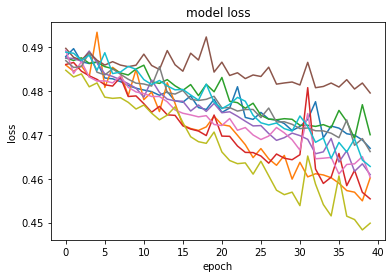

In [29]:
# run the back propagation for all test datas 10 times
tot_runtime = 0
tot_acc = 0
for i in range(10):
  runtime, acc = back_prop_test(x_test, y_test)
  tot_runtime += runtime
  tot_acc += acc
print(tot_runtime/10)
print(tot_acc/10)